In [45]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [46]:
print("Hello World")

Hello World


# Functions

In [47]:
def investigate(df: pd.DataFrame):
    print("Shape is : ", df.shape)
    plt.rcdefaults()
    fig, ax1 = plt.subplots(figsize=(5,3))
    # Graph for missing values
    hbars1 = ax1.barh(df.columns, df.isnull().sum()/df.shape[0]*100, align='center')
    ax1.set_xlabel('Number of Missing Values')
    title = 'Missing Values % within Timespan: '+ df["date"].min()+ " - " + df["date"].max()
    fig.suptitle(title)
    ax1.bar_label(hbars1, fmt='%.1f')
    plt.show
    pass

In [48]:
# Plots missing values
def investigate(df1: pd.DataFrame, df2:pd.DataFrame):
    print("Shape of df1 is : ", df1.shape)
    print("Shape of df2 is : ", df2.shape)
    plt.rcdefaults()
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(5,6), sharex=True)
    # Graph for NaN values
    hbars1 = ax1.barh(df1.columns, df1.isna().sum()/df1.shape[0]*100, align='center')
    ax1.set_xlabel('Missing Values %')
    ax1.set_title("df1 NaN Values %")
    ax1.bar_label(hbars1, fmt='%.1f')
    # Graph for Null values
    hbars2 = ax2.barh(df2.columns, df2.isna().sum()/df2.shape[0]*100, align='center')
    ax2.set_xlabel('Missing Values %')
    ax2.set_title("df2 NaN Values %")
    ax2.bar_label(hbars2, fmt="%.1f")
    
    title = 'Missing Values % within Timespan: '+ df1["date"].min()+ " - " + df1["date"].max()
    fig.suptitle(title)   
    plt.show()
    pass

In [49]:
# Filters datasets by date
def filter_by_date(df1: pd.DataFrame, df2: pd.DataFrame, start_date: str=None, end_date: str=None):
    
    start_date = max(df1["date"].min(), df2["date"].min()) if start_date == None else start_date
    end_date = min(df1["date"].max(), df2["date"].max()) if end_date == None else end_date
    df1 = df1[(df1["date"] >= start_date) & (df1["date"] <= end_date)]
    df2 = df2[(df2["date"] >= start_date) & (df2["date"] <= end_date)]
    print("Start date is: ",start_date)
    print("End date is: ",end_date)
    return df1,df2

In [50]:
# Plot for each cities date vs Fuel Oil Price graph
def plot_by_city(df: pd.DataFrame):
    city_list = list(df["City"].unique())
    plt.figure(figsize=(35,10))
    for city in city_list:
        temp_df = df[df["City"] == city]
        x = pd.to_datetime(temp_df["date"])
        y = temp_df["Motorin"]
        plt.plot(x,y)
    plt.xlabel("Date--->")
    plt.ylabel("Motorin Price (TL)")
    plt.show()

# EDA

In [51]:
# Read the datasets
file_name1 = "../data/fuel_data.csv"
file_name2 = "../data/epdk_petrol.csv"
data_1 = pd.read_csv(file_name1, sep=",", encoding='latin-1')
data_2 = pd.read_csv(file_name2, sep=",", encoding='latin-1')

In [52]:
print(data_1.shape)
data_1.head()

(511901, 10)


,date,City,District,Unleaded Fuel 95 Ultra Force 95,Diesel Fuel Ultra ForceEurodiesel,Diesel Fuel Eco ForceEurodiesel,Gasoil,Fuel Oil,Fuel Oil 6,Heating Oil
0,2021-12-01,ÇORUM,ALACA,9.85,9.51,9.48,10.51,8.94,7.39,9.92
1,2021-11-25,ÇORUM,BAYAT,9.85,9.95,9.92,10.97,9.15,7.67,10.21
2,2021-11-26,ÇORUM,BAYAT,9.85,9.95,9.92,11.42,9.62,8.04,10.70
3,2021-11-27,ÇORUM,BAYAT,9.85,9.95,9.92,10.90,9.15,7.61,10.18
4,2021-11-30,ÇORUM,BAYAT,9.85,9.95,9.92,9.84,8.41,6.89,9.30


In [53]:
columns = ["date","City","Diesel Fuel Ultra ForceEurodiesel","Diesel Fuel Eco ForceEurodiesel","Motorin_Ortalama_Fiyat"]
# EPDKdan aylık share bul, ağırlıklı ortalama
# opet_data, epdk_data
data_1["Motorin_Ortalama_Fiyat"] = (data_1["Diesel Fuel Ultra ForceEurodiesel"] +  data_1["Diesel Fuel Eco ForceEurodiesel"])/2
data_1 = data_1[columns]
print(data_1.shape)
data_1.head()

(511901, 5)


,date,City,Diesel Fuel Ultra ForceEurodiesel,Diesel Fuel Eco ForceEurodiesel,Motorin_Ortalama_Fiyat
0,2021-12-01,ÇORUM,9.51,9.48,9.495
1,2021-11-25,ÇORUM,9.95,9.92,9.935
2,2021-11-26,ÇORUM,9.95,9.92,9.935
3,2021-11-27,ÇORUM,9.95,9.92,9.935
4,2021-11-30,ÇORUM,9.95,9.92,9.935


In [54]:
data_2.head()

,date,production_tons,import_tons,export_tons,domestic_sales_consumption_tons
0,2014-01-01,1131897.0,1025961.0,583279.0,1535119.0
1,2014-01-02,1294719.0,830744.0,657894.0,1504530.0
2,2014-01-03,1389386.0,916912.0,594576.0,1611378.0
3,2014-01-04,1340980.0,970599.0,624820.0,1690180.0
4,2014-01-05,1183853.0,1168928.0,586144.0,1786913.0


In [55]:
data_2["check"] = data_2["production_tons"] + data_2["import_tons"] - data_2["export_tons"]

In [56]:
(data_2["check"] - data_2["domestic_sales_consumption_tons"]).head(15)

0       39460.0
1      -36961.0
2      100344.0
3       -3421.0
4      -20276.0
5      187752.0
6       90496.0
7      -97788.0
8      -65166.0
9      437575.0
10     -99042.0
11      25615.0
12    1762694.0
13     420199.0
14     704678.0
dtype: float64

In [57]:
print("fuel_data time interval: ",data_1["date"].min(), data_1["date"].max())
print("epdk_petrol time interval: ",data_2["date"].min(), data_2["date"].max())

fuel_data time interval:  2017-01-03 2022-07-19
epdk_petrol time interval:  2014-01-01 2022-03-01


In [58]:
# Filter the data
data_1, data_2 = filter_by_date(data_1,data_2)
print("fuel_data time interval: ",data_1["date"].min(), data_1["date"].max())
print("epdk_petrol time interval: ",data_2["date"].min(), data_2["date"].max())

Start date is:  2017-01-03
End date is:  2022-03-01
fuel_data time interval:  2017-01-03 2022-02-11
epdk_petrol time interval:  2017-01-03 2022-03-01


In [59]:
data_1.shape[0]

476205

In [60]:
# Investigate 
# investigate(df1=data_1, df2=data_2)
print(data_1.isna().sum()/data_1.isna().shape[0]*100)
data_2.isna().sum()

date                                 0.00000
City                                 0.00000
Diesel Fuel Ultra ForceEurodiesel    0.00987
Diesel Fuel Eco ForceEurodiesel      0.00987
Motorin_Ortalama_Fiyat               0.00987
dtype: float64


date                               0
production_tons                    0
import_tons                        0
export_tons                        0
domestic_sales_consumption_tons    0
check                              0
dtype: int64

In [61]:
# Create Timestamps
start_date = "2021-01-01"
end_date = "2022-01-01"
data_1, data_2 = filter_by_date(data_1,data_2,start_date=start_date)
print("fuel_data time interval: ",data_1["date"].min(), data_1["date"].max())
print("epdk_petrol time interval: ",data_2["date"].min(), data_2["date"].max())

Start date is:  2021-01-01
End date is:  2022-02-11
fuel_data time interval:  2021-01-01 2022-02-11
epdk_petrol time interval:  2021-01-01 2022-02-01


In [62]:
print(data_1["City"].unique().size)
data_1["City"].unique()

82


array(['ÇORUM', 'DENÝZLÝ', 'DÝYARBAKIR', 'DÜZCE', 'EDÝRNE', 'ELAZIÐ',
       'ERZÝNCAN', 'ERZURUM', 'ESKÝÞEHÝR', 'TRABZON', 'GAZÝANTEP',
       'GÝRESUN', 'GÜMÜÞHANE', 'HAKKARÝ', 'HATAY', 'IÐDIR', 'ISPARTA',
       'ÝSTANBUL ANADOLU', 'ÝSTANBUL AVRUPA', 'ÝZMÝR', 'KAHRAMANMARAÞ',
       'KARABÜK', 'KARAMAN', 'KARS', 'KASTAMONU', 'KAYSERÝ', 'KIRIKKALE',
       'KIRKLARELÝ', 'KIRÞEHÝR', 'KÝLÝS', 'KOCAELÝ', 'KONYA', 'KÜTAHYA',
       'MALATYA', 'MANÝSA', 'MARDÝN', 'MERSÝN', 'MUÐLA', 'MUÞ',
       'NEVÞEHÝR', 'NÝÐDE', 'ORDU', 'OSMANÝYE', 'RÝZE', 'SAKARYA',
       'SAMSUN', 'SÝÝRT', 'SÝNOP', 'SÝVAS', 'ÞANLIURFA', 'ÞIRNAK',
       'TEKÝRDAÐ', 'TOKAT', 'TUNCELÝ', 'UÞAK', 'VAN', 'YALOVA', 'YOZGAT',
       'ZONGULDAK', 'ADANA', 'ADIYAMAN', 'AFYONKARAHÝSAR', 'AÐRI',
       'AKSARAY', 'AMASYA', 'ANKARA', 'ANTALYA', 'ARDAHAN', 'ARTVÝN',
       'AYDIN', 'BALIKESÝR', 'BARTIN', 'BATMAN', 'BAYBURT', 'BÝLECÝK',
       'BÝNGÖL', 'BÝTLÝS', 'BOLU', 'BURDUR', 'BURSA', 'ÇANAKKALE',
       'ÇANKIRI'], dtype=o

In [69]:
# check duplicates
data_1.groupby(["City","date"]).size()

City    date      
ADANA   2021-01-01    16
        2021-01-05    16
        2021-01-06    16
        2021-01-07    16
        2021-01-12    16
                      ..
ÞIRNAK  2022-02-05     5
        2022-02-08     5
        2022-02-09     5
        2022-02-10     5
        2022-02-11     5
Length: 10414, dtype: int64

In [87]:
# temp = data_1[(data_1["City"] == "ADANA")]
temp = data_1

In [88]:
# arada neler var incele
temp[(temp.index > 65586) & (temp.index < 65772)].head(50)

,date,City,Diesel Fuel Ultra ForceEurodiesel,Diesel Fuel Eco ForceEurodiesel,Motorin_Ortalama_Fiyat
65587,2021-01-06,ADANA,6.79,6.75,6.770
65588,2021-01-07,ADANA,6.79,6.75,6.770
65589,2021-01-12,ADANA,6.79,6.75,6.770
65590,2021-01-13,ADANA,6.79,6.75,6.770
65591,2021-01-14,ADANA,6.79,6.75,6.770
65592,2021-01-26,ADANA,6.79,6.75,6.770
65593,2021-01-28,ADANA,6.79,6.75,6.770
65594,2021-02-06,ADANA,6.79,6.75,6.770
65595,2021-02-10,ADANA,6.80,6.76,6.780
65596,2021-02-11,ADANA,6.80,6.76,6.780


In [63]:
# Group Data based on City and date
graph_data = data_1.groupby(["City","date"]).mean().reset_index()
graph_data.head()

,City,date,Diesel Fuel Ultra ForceEurodiesel,Diesel Fuel Eco ForceEurodiesel,Motorin_Ortalama_Fiyat
0,ADANA,2021-01-01,6.764375,6.724375,6.744375
1,ADANA,2021-01-05,6.764375,6.724375,6.744375
2,ADANA,2021-01-06,6.784375,6.744375,6.764375
3,ADANA,2021-01-07,6.784375,6.744375,6.764375
4,ADANA,2021-01-12,6.784375,6.744375,6.764375


In [64]:
graph_data["City"].unique().size

82

In [65]:
# print(graph_data.shape)
# graph_data = graph_data[graph_data["District"]=="ORHANELÝ"]
# print(graph_data.shape)
# graph_data.drop_duplicates(subset=["date"],keep="first",inplace=True)
# print(graph_data.shape)
# graph_data["date"] = pd.to_datetime(graph_data["date"])
# graph_data.sort_values(by=["date"],ascending=True)
# graph_data.head(15)

In [66]:
graph_data_ = graph_data[graph_data["City"] == "BURSA"]

In [67]:
x = pd.to_datetime(graph_data_["date"])
y = graph_data_["Motorin"]
plt.figure(figsize=(25,5))
plt.plot(x,y)
plt.show()

KeyError: 'Motorin'

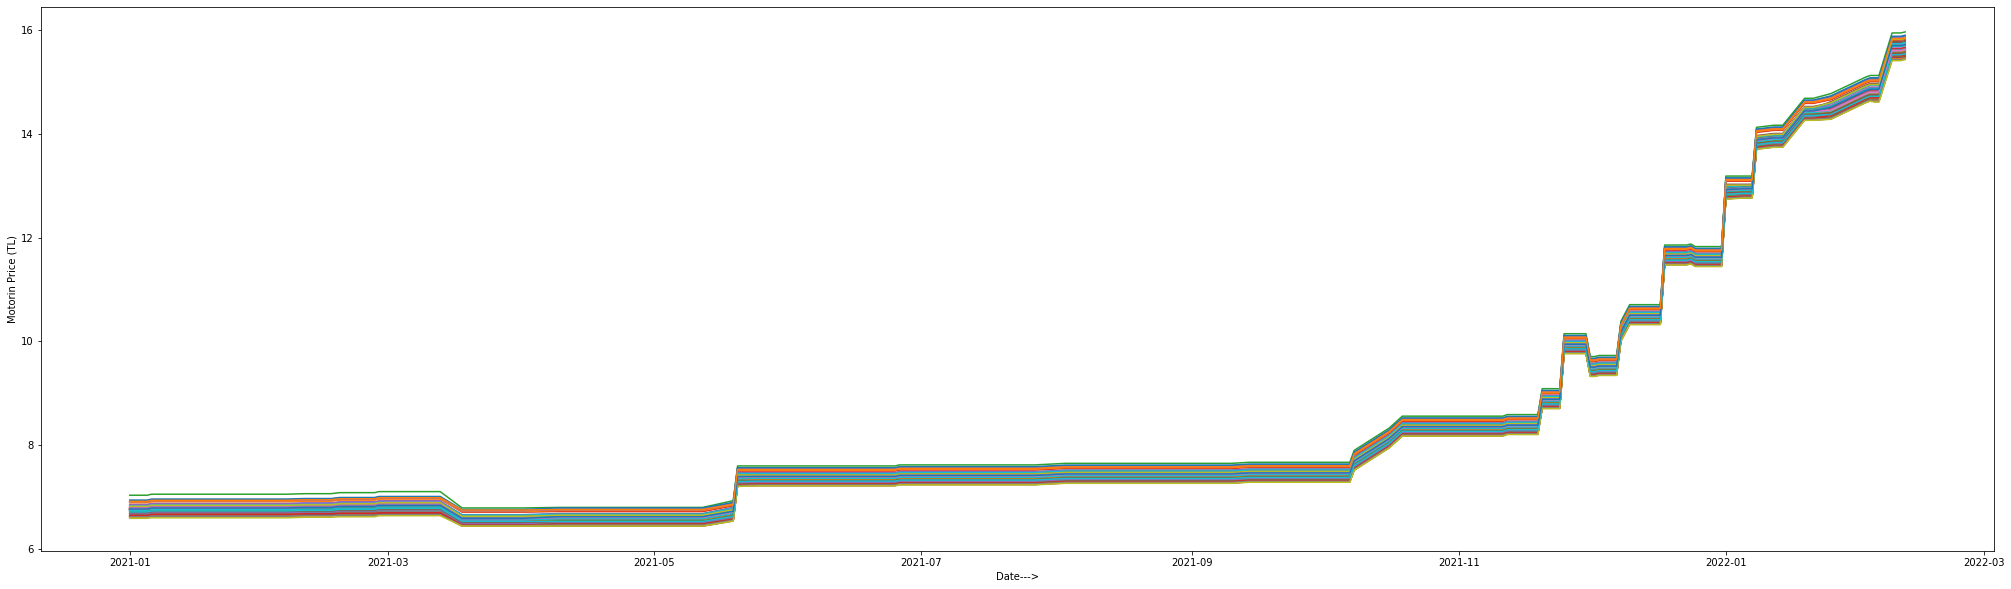

In [ ]:
plot_by_city(df=graph_data)